The dataset consists of 8 unbalanced classes of buildings. 4 classes are tiny compared to the majority class 'Wohngebaede'.
This notebook augments the dataset focusing on these 4 smallest classes. 
It adds cropped and flipped images containing only buildings of the smallest classes.

In [1]:
import albumentations as A
import cv2
from PIL import Image, ImageOps
import numpy as np
import os

In [29]:
def getfilenames(path):
    filenames = []
    for file in os.listdir(path):
        name, extension = os.path.splitext(file)
        if extension == '.tif':
            filenames.append(file)
    return filenames

In [129]:
def readimages(path):
    images = []
    names = getfilenames(path)
    for name in sorted(names):
        pillow_image = Image.open(path + name)
        image = np.array(pillow_image)
        images.append(image)
    return images

create transformations using the albumentations library 

In [56]:
random_crop = A.Compose([
    A.Rotate(limit=90, p=1),
    A.RandomCrop(width=125, height=125)
])
horizontal_flip = A.Compose([
    A.HorizontalFlip(p=1),
])
vertical_flip = A.Compose([
    A.VerticalFlip(p=1),
])

loading the dataset for augmentation

In [46]:
input_path = r'./data_img_sliced/downsampled_250/'
target_path = r'./data_img_sliced/downsampled_mask_250/'

In [26]:
path_to_save_img = r'./data_img_sliced/input/'
path_to_save_mask = r'./data_img_sliced/target/'

get file names from the input folder

In [130]:
filenames = getfilenames(input_path)
filenames[:10]

['swissimage-dop10_2019_2682700_1233100_4.0_2056.tif',
 'swissimage-dop10_2019_2683400_1261800_4.0_2056.tif',
 'swissimage-dop10_2019_2674800_1232300_4.0_2056.tif',
 'swissimage-dop10_2019_2703200_1233900_4.0_2056.tif',
 'swissimage-dop10_2019_2709300_1243100_4.0_2056.tif',
 'swissimage-dop10_2019_2693300_1236100_4.0_2056.tif',
 'swissimage-dop10_2019_2702700_1252700_4.0_2056.tif',
 'swissimage-dop10_2019_2677400_1250100_4.0_2056.tif',
 'swissimage-dop10_2019_2700100_1240900_4.0_2056.tif',
 'swissimage-dop10_2019_2677000_1249700_4.0_2056.tif']

In [131]:
names = sorted(list(filenames[:10]))

convert images to numpy arrays as expected by the albumentation library

In [132]:
images = []
for name in names:
    pillow_image = Image.open(input_path + name)
    image = np.array(pillow_image)
    images.append(image)

In [133]:
masks = []
for name in names:
    #note that file names of masks look like 'mask_swissimage-dop10_2019_2698800_1232750_4.0_2056.tif'
    pillow_mask = Image.open(target_path + 'mask_' + name)  
    mask = np.array(pillow_mask)
    masks.append(mask)

In [134]:
TINY_CLASSES = [5,6,7,8]
for i, name in enumerate(list(names)):
    #crop 4 times for optimal class balance
    for j in range(0,3):
        cropped = random_crop(image=images[i], mask=masks[i])
        #check if the cropped image contains a building of tiny classes
        if any(x in cropped['mask'] for x in TINY_CLASSES):
            Image.fromarray(cropped['image']).save(path_to_save_img + name.replace('.tif', '_' + str(j) + '.tif'))
            Image.fromarray(cropped['mask']).save(path_to_save_mask + 'mask_' + name.replace('.tif', '_' + str(j) + '.tif'))
            cropped_img = Image.fromarray(cropped['image'])
            orig_img = Image.fromarray(images[i])
            mask = Image.fromarray(cropped['mask'])
            

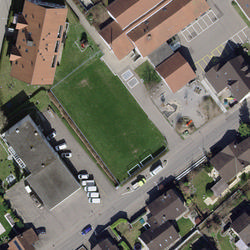

In [136]:
orig_img

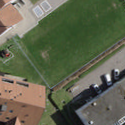

In [137]:
cropped_img

In [138]:
cropped_filenames = getfilenames(path_to_save_img)
sorted(cropped_filenames)

['swissimage-dop10_2019_2682700_1233100_4.0_2056_2.tif',
 'swissimage-dop10_2019_2683400_1261800_4.0_2056_1.tif',
 'swissimage-dop10_2019_2683400_1261800_4.0_2056_2.tif']

crop is done, let's flip

In [139]:
images_toflip = readimages(path_to_save_img)

In [140]:
masks_toflip = readimages(path_to_save_mask)

In [143]:
for i, name in enumerate(cropped_filenames):
    hfliped = horizontal_flip(image=images_toflip[i], mask=masks_toflip[i])
    vfliped = vertical_flip(image=images_toflip[i], mask=masks_toflip[i])
    Image.fromarray(hfliped['image']).save(path_to_save_img + name.replace('.tif', '_h' + '.tif'))
    Image.fromarray(hfliped['mask']).save(path_to_save_mask + 'mask_' + name.replace('.tif', '_h' + '.tif'))
    Image.fromarray(vfliped['image']).save(path_to_save_img + name.replace('.tif', '_v' + '.tif'))
    Image.fromarray(vfliped['mask']).save(path_to_save_mask + 'mask_' + name.replace('.tif', '_v' + '.tif'))
    cropped_img = Image.fromarray(images_toflip[i])
    h_flip = Image.fromarray(hfliped['image'])
    v_flip = Image.fromarray(vfliped['image'])
    v_flip_mask = Image.fromarray(vfliped['mask'])

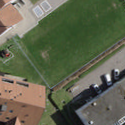

In [144]:
cropped_img

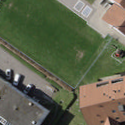

In [145]:
h_flip

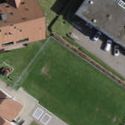

In [146]:
v_flip

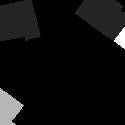

In [147]:
ImageOps.autocontrast(v_flip_mask)

Augmentation is done